In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"D:\iris flower dataset.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df1=df.copy()

In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.duplicated().value_counts()

False    147
True       3
Name: count, dtype: int64

In [8]:
df.drop_duplicates(subset=None,inplace=True)

In [9]:
df.shape

(147, 5)

In [10]:
df['species'].value_counts()

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

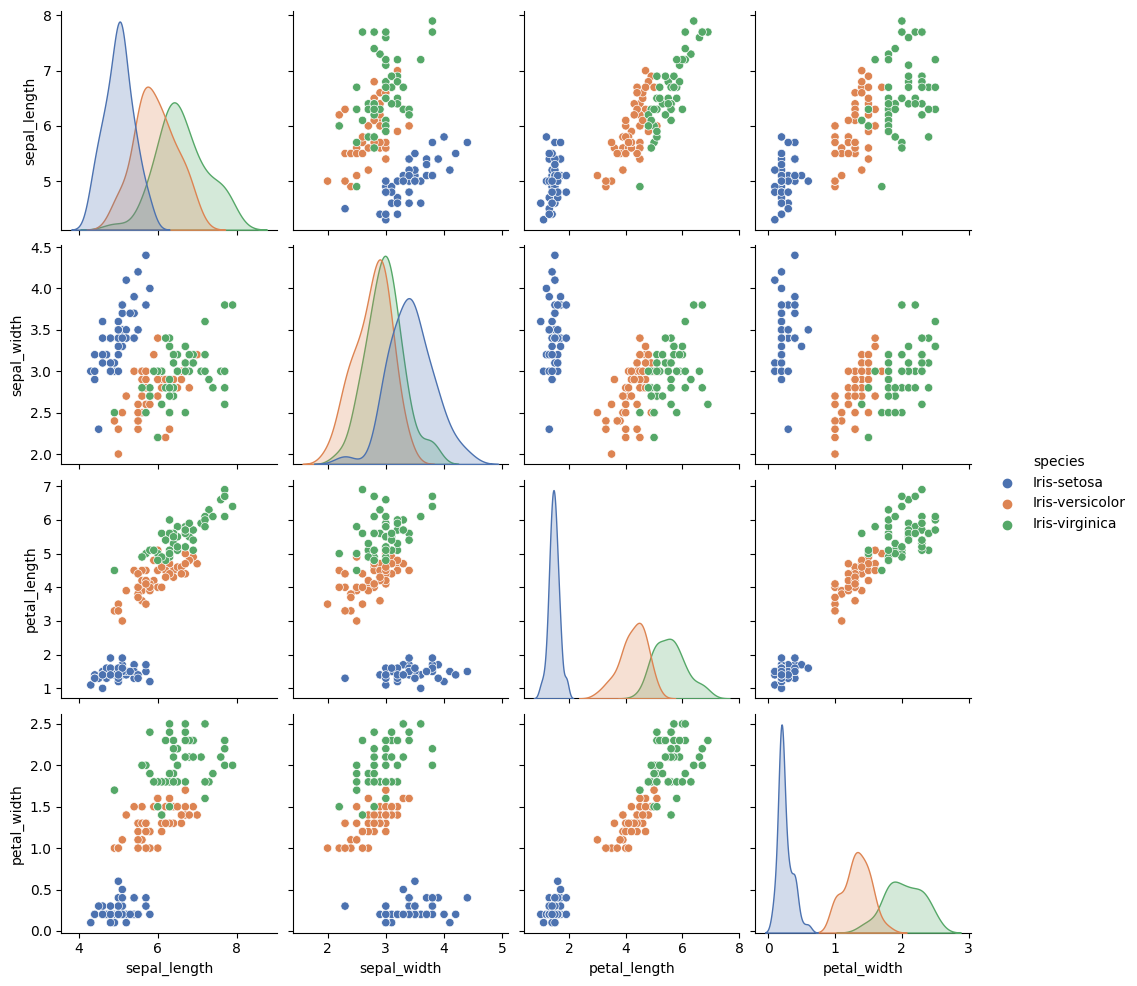

In [11]:
sns.pairplot(df,hue='species',kind='scatter',diag_kind="kde",palette="deep")

### This plot shows that difference between each column by pair plot in which scatter and kde plots were used to describe the sepal lenght,sepal width,petal length,petal width.

Text(0.5, 1.0, 'petal width')

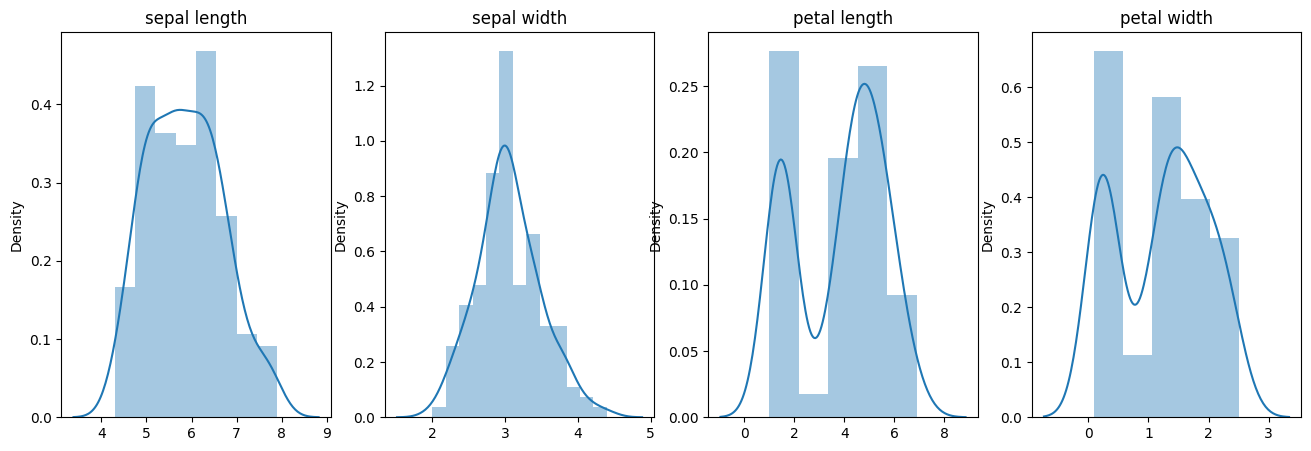

In [12]:
plt.figure(figsize=(16,5))
plt.subplot(141)
sns.distplot(df[['sepal_length']]).set_title('sepal length')
plt.subplot(142)
sns.distplot(df[['sepal_width']]).set_title('sepal width')
plt.subplot(143)
sns.distplot(df[['petal_length']]).set_title('petal length')
plt.subplot(144)
sns.distplot(df[['petal_width']]).set_title('petal width')

### This distplot describes the skewness of its density. This helps to easy comparitive between the columns.

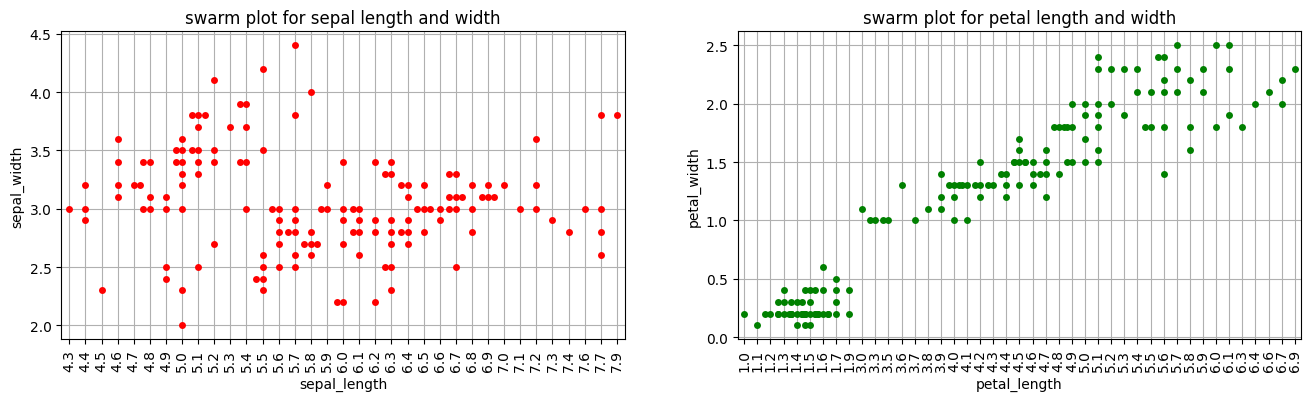

In [13]:
plt.figure(figsize=(16,4))
plt.subplot(121)
sns.swarmplot(x="sepal_length",y="sepal_width",data=df,color='red').set_title('swarm plot for sepal length and width')
plt.xticks(rotation=90)
plt.grid()
plt.subplot(122)
sns.swarmplot(x="petal_length",y="petal_width",data=df,color='green').set_title('swarm plot for petal length and width')
plt.xticks(rotation=90)
plt.grid()
plt.show()

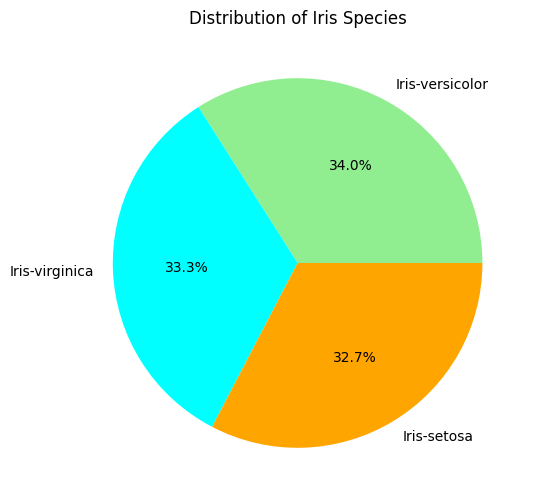

In [14]:
species_counts = df['species'].value_counts()

index = species_counts.index
counts = species_counts.values

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=index, autopct='%1.1f%%', colors=['lightgreen','cyan','orange'])
plt.title("Distribution of Iris Species")
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder


In [16]:
lb=LabelEncoder()
df['species']=lb.fit_transform(df['species'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 6.3 KB


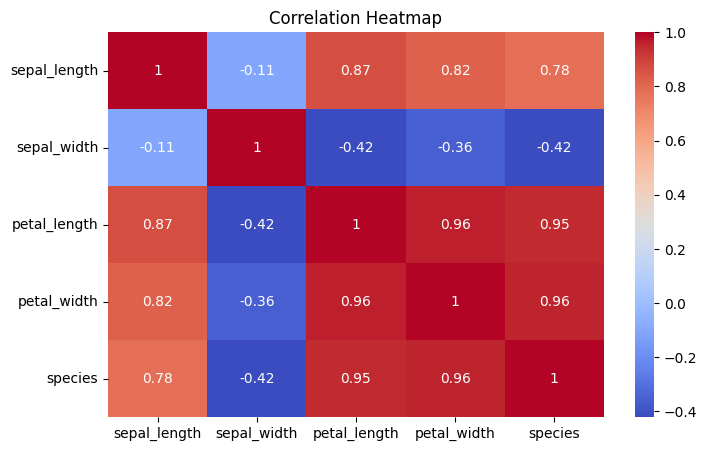

In [18]:
correlation_matrix=df.corr()
plt.figure(figsize=(8,5))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaling=sc.fit_transform(df)
scaling

array([[-0.91550949,  1.0199714 , -1.35773692, -1.33570001, -1.2394597 ],
       [-1.15755966, -0.12808217, -1.35773692, -1.33570001, -1.2394597 ],
       [-1.39960983,  0.33113926, -1.41477817, -1.33570001, -1.2394597 ],
       [-1.52063491,  0.10152855, -1.30069567, -1.33570001, -1.2394597 ],
       [-1.03653457,  1.24958212, -1.35773692, -1.33570001, -1.2394597 ],
       [-0.55243423,  1.93841426, -1.18661318, -1.07090176, -1.2394597 ],
       [-1.52063491,  0.79036069, -1.35773692, -1.20330089, -1.2394597 ],
       [-1.03653457,  0.79036069, -1.30069567, -1.33570001, -1.2394597 ],
       [-1.76268509, -0.35769288, -1.35773692, -1.33570001, -1.2394597 ],
       [-1.15755966,  0.10152855, -1.30069567, -1.46809914, -1.2394597 ],
       [-0.55243423,  1.47919283, -1.30069567, -1.33570001, -1.2394597 ],
       [-1.27858474,  0.79036069, -1.24365442, -1.33570001, -1.2394597 ],
       [-1.27858474, -0.12808217, -1.35773692, -1.46809914, -1.2394597 ],
       [-1.88371017, -0.12808217, -1.5

##### splitting dependent and independent variables


In [20]:
x=df.drop(['species'],axis=1)
y=df['species']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(147, 4)
(147,)


##### Training and Testing the x and y data

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(102, 4)
(45, 4)
(102,)
(45,)


##### Evaluating model

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [23]:
def class_eval(y_test,y_pred):
    CM=confusion_matrix(y_test,y_pred)
    AS=accuracy_score(y_test,y_pred)
    CR=classification_report(y_test,y_pred)
    
    print(CM)
    print(AS)
    print(CR)
    
def mscore(model):
    print("Training score", model.score(x_train,y_train))
    print("Testing score",model.score(x_test,y_test))

#### Building a model using Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr=LogisticRegression(C=0.1,max_iter=100,random_state=42,solver='liblinear')
lr.fit(x_train,y_train)
mscore(lr)

Training score 0.9215686274509803
Testing score 0.9111111111111111


In [26]:
ypred_lr = lr.predict(x_test)
ypred_lr

array([2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 2,
       1])

In [27]:
class_eval(y_test,ypred_lr)

[[17  0  0]
 [ 0  8  4]
 [ 0  0 16]]
0.9111111111111111
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.67      0.80        12
           2       0.80      1.00      0.89        16

    accuracy                           0.91        45
   macro avg       0.93      0.89      0.90        45
weighted avg       0.93      0.91      0.91        45



In [28]:
lr_accuracy_score = accuracy_score(y_test, ypred_lr)
print('LogisticRegression_accuracy score:',lr_accuracy_score)

LogisticRegression_accuracy score: 0.9111111111111111


##### Building a model using DecisionTree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
dtree=DecisionTreeClassifier(max_depth=15,min_samples_split=10,min_samples_leaf=10,max_features='sqrt',random_state=42)
dtree.fit(x_train,y_train)
mscore(dtree)

Training score 0.9607843137254902
Testing score 0.9555555555555556


In [31]:
ypred_dtree=dtree.predict(x_test)
ypred_dtree

array([2, 1, 2, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 0, 0, 2, 1, 2,
       1])

In [32]:
class_eval(y_test,ypred_dtree)

[[17  0  0]
 [ 0 12  0]
 [ 0  2 14]]
0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.86      1.00      0.92        12
           2       1.00      0.88      0.93        16

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



In [33]:
Dtree_accuracy_score = accuracy_score(y_test, ypred_dtree)
print('DecisionTreeClassifier_accuracy score:',Dtree_accuracy_score)

DecisionTreeClassifier_accuracy score: 0.9555555555555556


In [34]:
from sklearn.tree import plot_tree

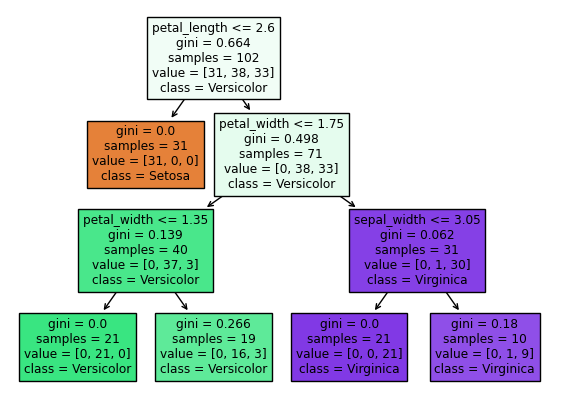

In [35]:
class_names = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
plt.figure(figsize=(7,5))
plot_tree(dtree, filled=True, feature_names=x.columns, class_names=[class_names[i] for i in dtree.classes_])
plt.show()

##### Building a model using RandomForest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
Rforest=RandomForestClassifier(n_estimators=200,max_depth=20,min_samples_split=40, max_features='sqrt', random_state=42,criterion='gini')
Rforest.fit(x_train,y_train)
mscore(Rforest)

Training score 0.9705882352941176
Testing score 0.9333333333333333


In [38]:
ypred_rf=Rforest.predict(x_test)
ypred_rf

array([2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 1, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 2,
       1])

In [39]:
class_eval(y_test,ypred_rf)

[[17  0  0]
 [ 0 11  1]
 [ 0  2 14]]
0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.85      0.92      0.88        12
           2       0.93      0.88      0.90        16

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [40]:
Rf_accuracy_score=accuracy_score(y_test,ypred_rf)
print('RandomForestClassifier accuracy score',Rf_accuracy_score)

RandomForestClassifier accuracy score 0.9333333333333333


##### choosing the best model

In [41]:
acc_logReg = accuracy_score(y_test,ypred_lr)
acc_randomforest = accuracy_score(y_test,ypred_rf)
acc_decisiontree = accuracy_score(y_test,ypred_dtree)

print('Accuracy of LogisticRegression Model is',acc_logReg)
print('Accuracy of Random Forest Classifier Model is',acc_randomforest)
print('Accuracy of Decision Tree Classifier Model is',acc_decisiontree)

Accuracy of LogisticRegression Model is 0.9111111111111111
Accuracy of Random Forest Classifier Model is 0.9333333333333333
Accuracy of Decision Tree Classifier Model is 0.9555555555555556


In [42]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

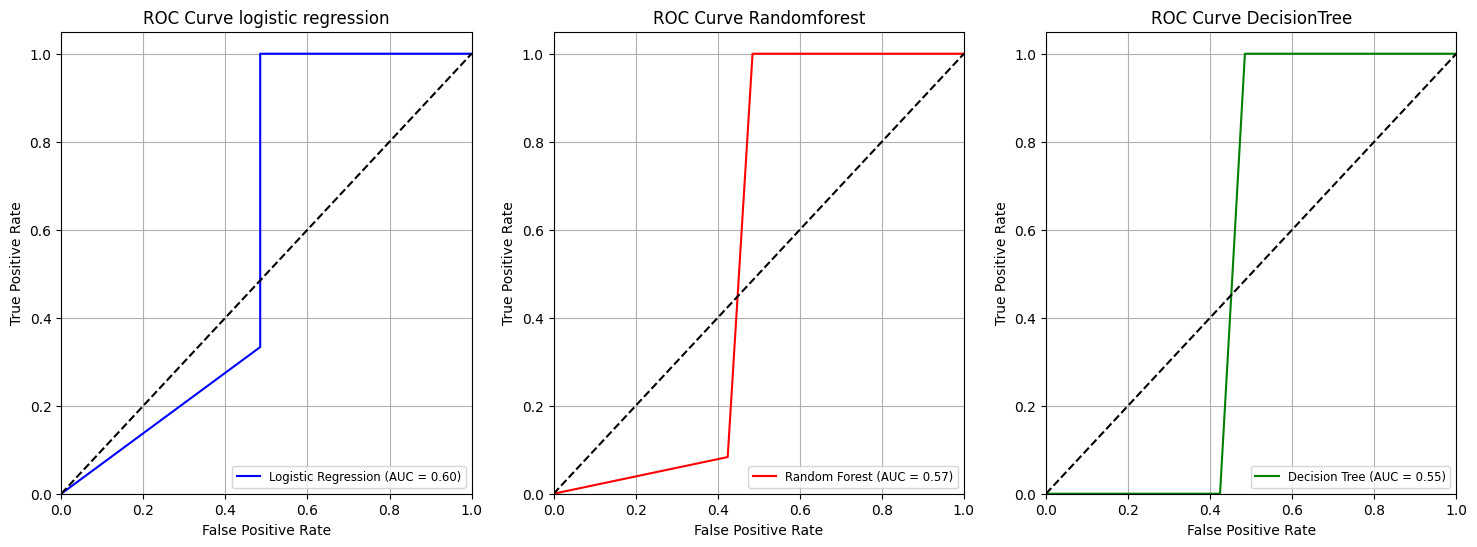

In [43]:
positive_class = 1
binary_labels = (y_test == positive_class).astype(int)

fpr_lr, tpr_lr, thresholds_lr = roc_curve(binary_labels, ypred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(binary_labels, ypred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_dtree, tpr_dtree, thresholds_dtree = roc_curve(binary_labels, ypred_dtree)
roc_auc_dtree = auc(fpr_dtree, tpr_dtree)

# Plot ROC curves for logistic regression
plt.figure(figsize=(18, 6))
plt.subplot(1,3,1)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})',color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve logistic regression')
plt.legend(loc="lower right", fontsize='small')
plt.grid()


# Plot ROC curves for Random Forest Classifier
plt.subplot(1,3,2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})',color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Randomforest')
plt.legend(loc="lower right", fontsize='small')
plt.grid()

# Plot ROC curves for Decision Tree Classifier
plt.subplot(1,3,3)
plt.plot(fpr_dtree, tpr_dtree, label=f'Decision Tree (AUC = {roc_auc_dtree:.2f})',color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve DecisionTree')
plt.legend(loc="lower right", fontsize='small')
plt.grid()

plt.show()

##### choosing a best model as Decision Tree model. It has comparitively highest Accuracy score.

In [44]:
import pickle

### SAVING LOGISTIC REGRESSION MODEL 

In [45]:
model_lr=LogisticRegression(C=0.2,max_iter=100,random_state=42)
model_lr.fit(x_train,y_train)
mscore(model_lr)

Training score 0.9607843137254902
Testing score 0.9333333333333333


In [46]:
with open ('LogisticRegression_model.pkl','wb') as lr_file:
    pickle.dump(model_lr,lr_file)

### LOADING LOGISTIC REGRESSION MODEL

In [47]:
with open ('LogisticRegression_model.pkl','rb') as lr_file:
    loaded_lr_model=pickle.load(lr_file)
    

### SAVING DECISION TREE MODEL

In [48]:
model_dtree=dtree=DecisionTreeClassifier(max_depth=15,min_samples_split=10,min_samples_leaf=10,max_features='sqrt',random_state=42)
model_dtree.fit(x_train,y_train)
mscore(model_dtree)

Training score 0.9607843137254902
Testing score 0.9555555555555556


In [49]:
with open ('DecisionTree_class_model.pkl','wb') as dt_file:
    pickle.dump(model_dtree,dt_file)


### LOADING DECISION TREE MODEL

In [50]:
with open ("DecisionTree_class_model.pkl", 'rb') as dt_file:
    loaded_dt_model=pickle.load(dt_file)

### SAVING RANDOM FOREST MODEL

In [51]:
model_Rforest=RandomForestClassifier(n_estimators=150,max_depth=20,min_samples_split=40, max_features='sqrt', random_state=42,criterion='gini')
model_Rforest.fit(x_train,y_train)
mscore(model_Rforest)

Training score 0.9705882352941176
Testing score 0.9111111111111111


In [52]:
with open('Randomforest_class_model.pkl', 'wb') as rf_file:
    pickle.dump(model_Rforest,rf_file)

### LOADING RANDOM FOREST MODEL

In [53]:
with open('Randomforest_class_model.pkl', 'rb') as rf_file:
    loaded_rf_model=pickle.load(rf_file)

In [54]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [55]:
df['species_predict']=dtree.predict(x)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_predict
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [56]:
df['species']=lb.inverse_transform(df['species'])
df['species_predict']=lb.inverse_transform(df['species_predict'])

In [57]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_predict
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa


In [58]:
random_df=df.sample(n=20,random_state=42)
random_df

,sepal_length,sepal_width,petal_length,petal_width,species,species_predict
127,6.1,3.0,4.9,1.8,Iris-virginica,Iris-virginica
53,5.5,2.3,4.0,1.3,Iris-versicolor,Iris-versicolor
140,6.7,3.1,5.6,2.4,Iris-virginica,Iris-virginica
19,5.1,3.8,1.5,0.3,Iris-setosa,Iris-setosa
106,4.9,2.5,4.5,1.7,Iris-virginica,Iris-versicolor
12,4.8,3.0,1.4,0.1,Iris-setosa,Iris-setosa
78,6.0,2.9,4.5,1.5,Iris-versicolor,Iris-versicolor
31,5.4,3.4,1.5,0.4,Iris-setosa,Iris-setosa
83,6.0,2.7,5.1,1.6,Iris-versicolor,Iris-versicolor
9,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa


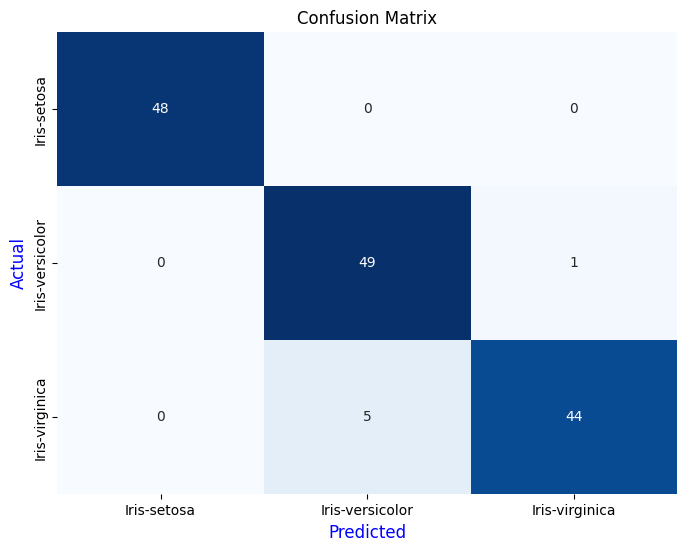

In [63]:
cm = confusion_matrix(df["species"], df["species_predict"])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
            yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted',fontsize='large',color='blue')
plt.ylabel('Actual',fontsize='large',color='blue')
plt.show()


### In this confusion matrix it shows iris-versicolor and iris-virginica has 6 data was wrongly predicted. 

In [ ]:
import random

### Here I have done sample test data from randomly selecting 20 datas from original dataset.

In [ ]:
random_df1=df1.sample(n=20,random_state=42)
random_df1

,sepal_length,sepal_width,petal_length,petal_width,species
73,6.1,2.8,4.7,1.2,Iris-versicolor
18,5.7,3.8,1.7,0.3,Iris-setosa
118,7.7,2.6,6.9,2.3,Iris-virginica
78,6.0,2.9,4.5,1.5,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor
31,5.4,3.4,1.5,0.4,Iris-setosa
64,5.6,2.9,3.6,1.3,Iris-versicolor
141,6.9,3.1,5.1,2.3,Iris-virginica
68,6.2,2.2,4.5,1.5,Iris-versicolor
82,5.8,2.7,3.9,1.2,Iris-versicolor


In [ ]:
random_df1.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [ ]:
random_df1['species']=lb.fit_transform(random_df1['species'])

In [ ]:
a=random_df1.drop(['species'],axis=1)
b=random_df1['species']
print(type(a))
print(type(b))
print(a.shape)
print(b.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(20, 4)
(20,)


In [ ]:
from sklearn.model_selection import train_test_split
a_train,a_test,b_train,b_test = train_test_split(a,b,test_size=0.30,random_state=42)
print(a_train.shape)
print(a_test.shape)
print(b_train.shape)
print(b_test.shape)

(14, 4)
(6, 4)
(14,)
(6,)


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
def reg_eval_metrics (b,bpred):
    mae=mean_absolute_error(b,bpred)
    mse=mean_squared_error(b,bpred)
    rmse=np.sqrt(mean_squared_error(b,bpred))
    r2=r2_score(b,bpred)
    print('MAE', mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2_SCORE',r2)
    
    
def train_test_scr(model):
    print('training score',model.score(a_train,b_train))
    print('testing score',model.score(a_test,b_test))

In [ ]:
dtree_model=DecisionTreeClassifier(max_depth=2,min_samples_split=2,min_samples_leaf=2,max_features='sqrt',random_state=42)
dtree_model.fit(a_train,b_train)
ypred_testing_dtree=dtree_model.predict(a_test)
mscore(dtree_model)

Training score 0.9705882352941176
Testing score 0.8888888888888888
